In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
filepath=r"C:\Users\s-mkandemir\Anaconda3\telecom_churn.csv"
data=pd.read_csv(filepath)
data.head()



,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [20]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


<AxesSubplot:title={'center':'All Over Churned Ratio'}, ylabel='Churn'>

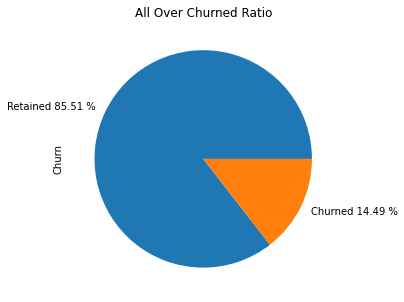

In [21]:
data["Churn"].value_counts().plot(kind="pie", title="All Over Churned Ratio",
                                labels = ["Retained {:.2f} %".format(len(data.loc[data.Churn==0])*100/len(data.Churn)),
                                          "Churned {:.2f} %".format(len(data.loc[data.Churn==1])*100/len(data.Churn))],
                                figsize=(5,5))

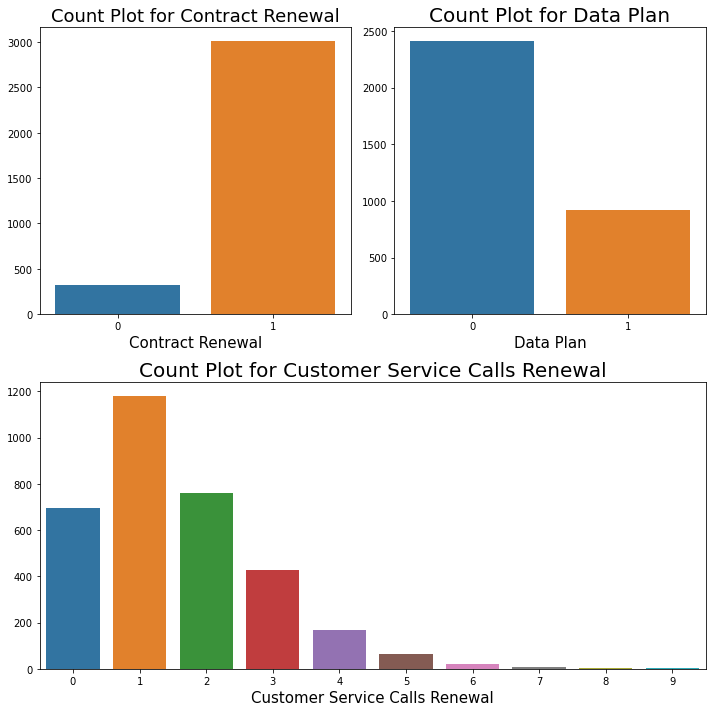

In [22]:
ax = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data = data , x = "ContractRenewal" )
plt.title("Count Plot for Contract Renewal" , size=18)
plt.xlabel("Contract Renewal", size=15)
plt.ylabel('')
plt.subplot(2,2,2)
sns.countplot(data = data , x = "DataPlan" )
plt.title("Count Plot for Data Plan" , size=20)
plt.xlabel("Data Plan", size=15)
plt.ylabel('')
plt.subplot(2,2,(3,4))
sns.countplot(data = data , x = "CustServCalls" )
plt.title("Count Plot for Customer Service Calls Renewal" , size=20)
plt.xlabel("Customer Service Calls Renewal", size=15)
plt.ylabel('')
plt.tight_layout()
plt.show()

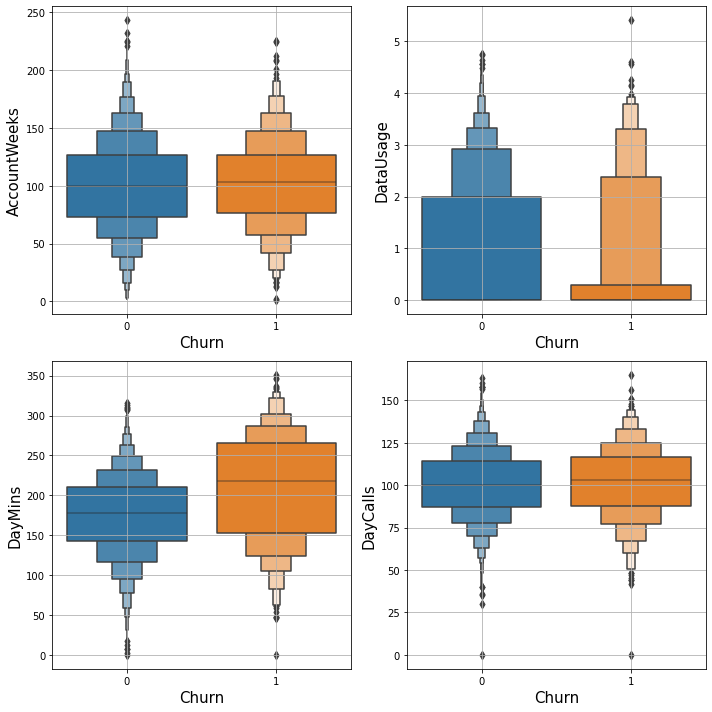

In [23]:
ax = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxenplot(data = data , y = "AccountWeeks" , x = "Churn" )
plt.grid(True)
plt.xlabel("Churn",size=15)
plt.ylabel("AccountWeeks",size=15)
plt.subplot(2,2,2)
sns.boxenplot(data = data , y = "DataUsage" ,  x = "Churn")
plt.grid(True)
plt.xlabel("Churn",size=15)
plt.ylabel("DataUsage",size=15)
plt.subplot(2,2,3)
sns.boxenplot(data = data , y = "DayMins" , x = "Churn")
plt.grid(True)
plt.xlabel("Churn",size=15)
plt.ylabel("DayMins",size=15)
plt.subplot(2,2,4)
sns.boxenplot(data = data , y = "DayCalls" , x = "Churn" )
plt.grid(True)
plt.xlabel("Churn",size=15)
plt.ylabel("DayCalls",size=15)
plt.tight_layout()
plt.show()

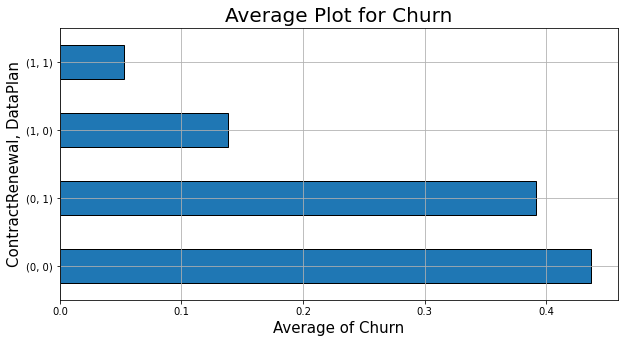

In [24]:
ax = plt.figure(figsize=(10,10))
data.groupby(['ContractRenewal',"DataPlan"])['Churn'].mean().plot(figsize=(10,5),kind="barh",edgecolor='k')
plt.title("Average Plot for Churn" , size=20)
plt.ylabel("ContractRenewal, DataPlan",size=15)
plt.xlabel("Average of Churn",size=15)
plt.grid(True)
plt.show()

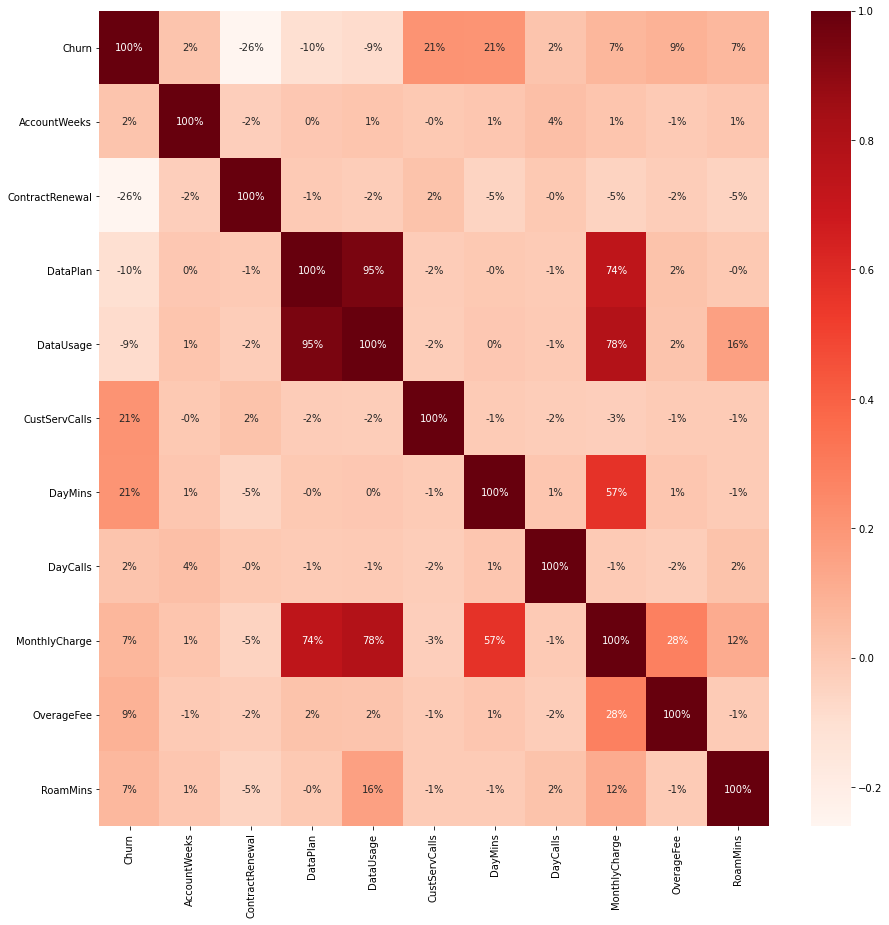

In [25]:
ax = plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap="Reds", fmt='.0%')
plt.show()

In [43]:
scaler = StandardScaler().fit(data.drop("Churn",axis=1))
xData = scaler.transform(data.drop("Churn",axis=1))
yData = data["Churn"]
xTrain,xTest,yTrain,yTest=train_test_split(xData,yData,test_size=.2,random_state=0)
model=RandomForestClassifier(n_estimators=300)
model.fit(xTrain,yTrain)
pred=model.predict(xTest)
print(accuracy_score(yTest,pred))


0.9400299850074962
